参考：[机器学习系列(3)_逻辑回归应用之Kaggle泰坦尼克之灾](http://blog.csdn.net/han_xiaoyang/article/details/49797143)

In [1]:
import pandas as pd
import numpy as np

data_train = pd.read_csv('../input/train.csv')

## 乘客的各个属性的分布

In [2]:
# 0- 死亡，1- 幸存
data_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### subplot2grid 的用法

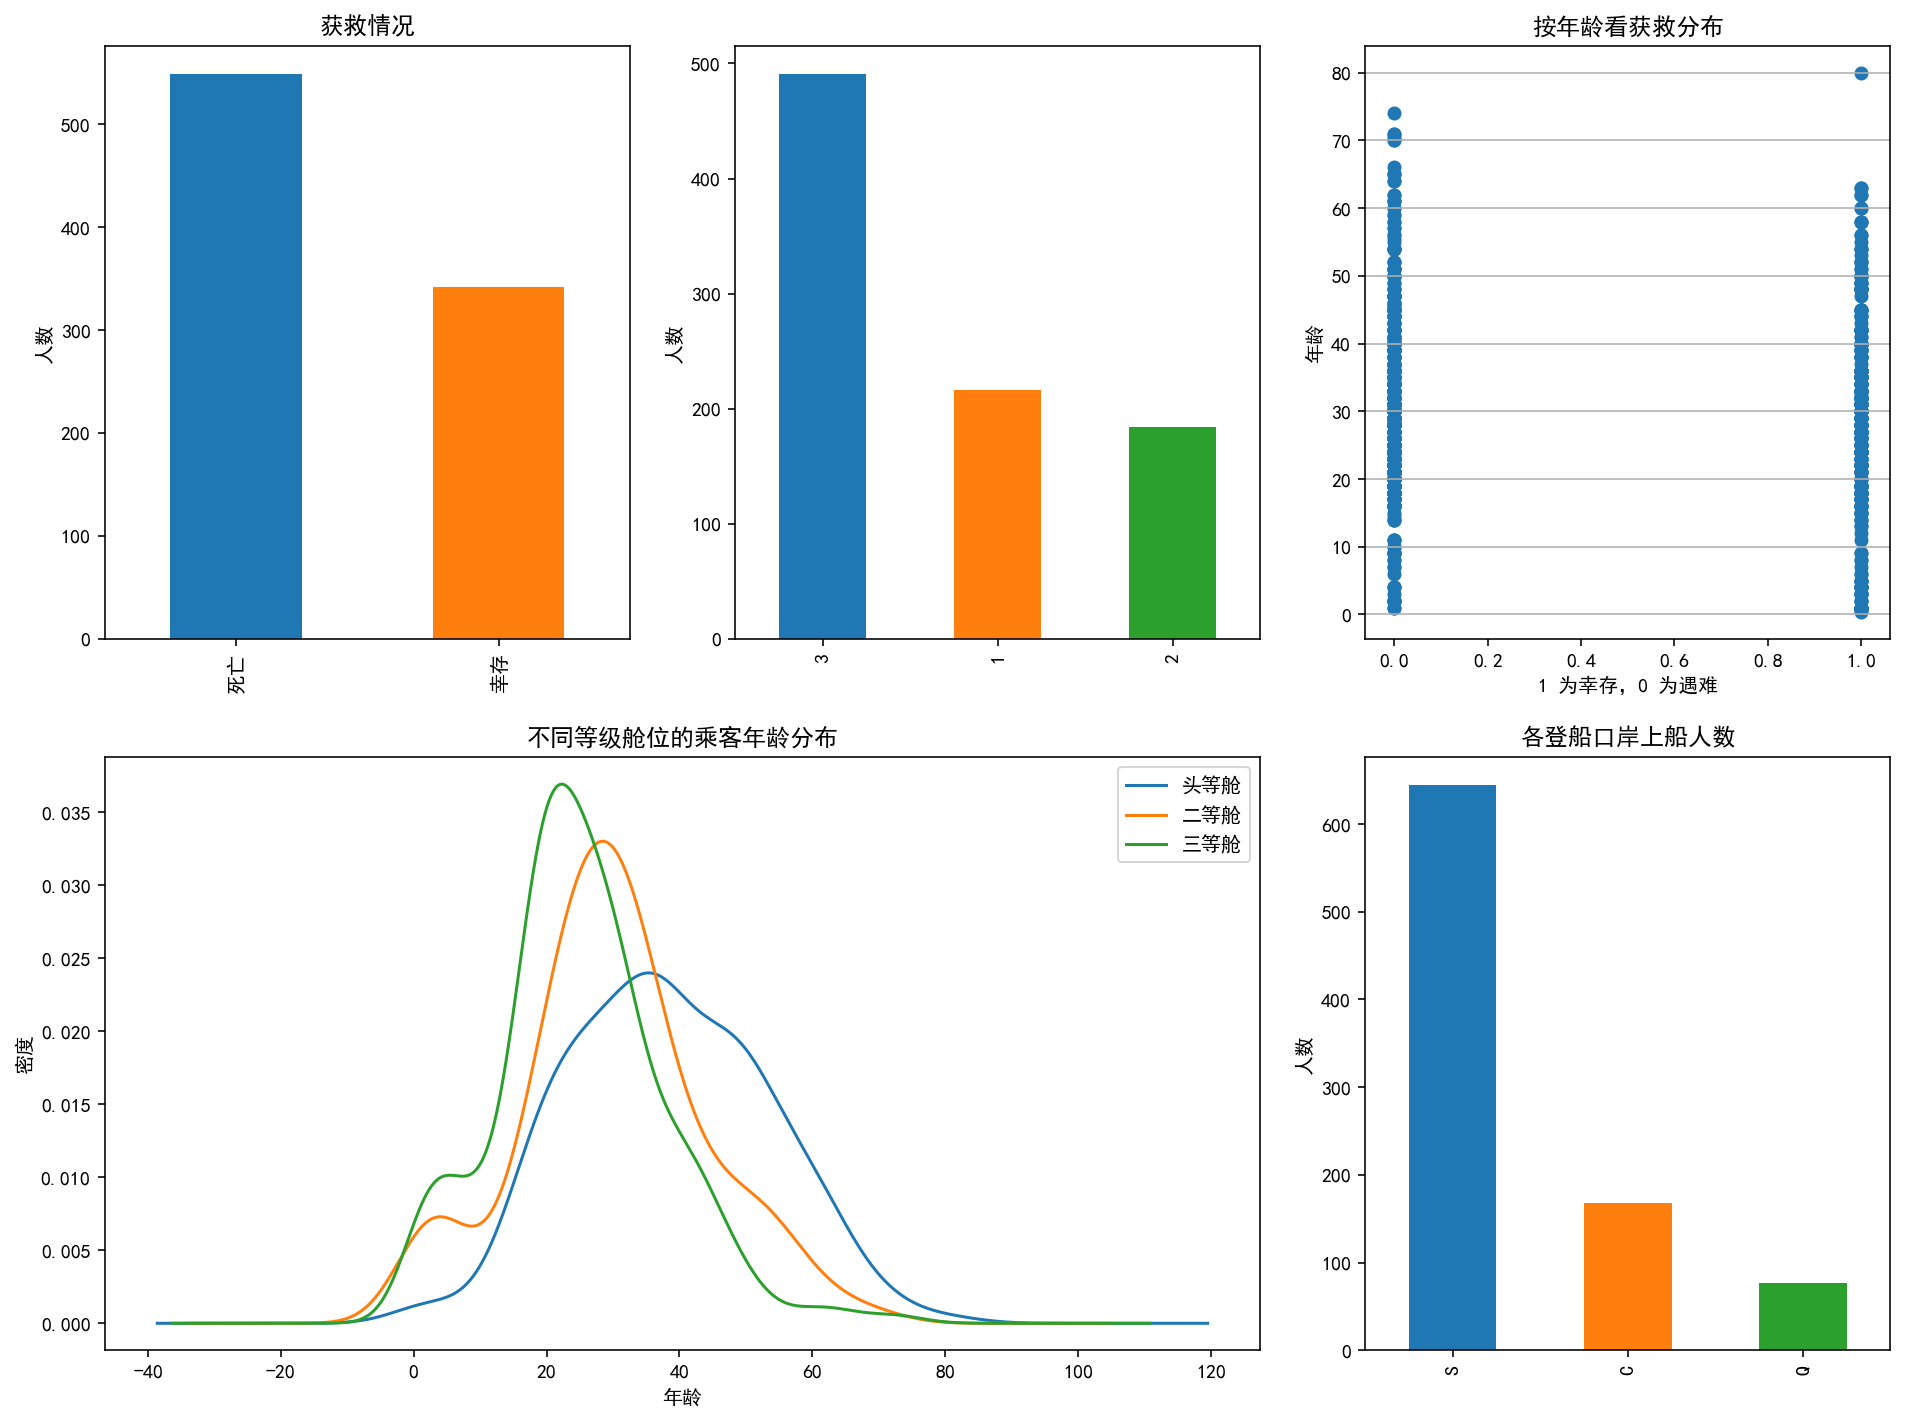

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(16, 12))
fig.set(alpha=0.2)
plt.subplot2grid((2, 3), (0, 0))

plt.title('获救情况')
data_train.Survived.value_counts().rename({0: '死亡', 1: '幸存'}).plot(kind='bar')
plt.ylabel('人数')

plt.subplot2grid((2, 3), (0, 1))
# 乘客等级分布
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel('人数')
plt.title('')

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
#
plt.grid(b=True, which='major', axis='y')
plt.title('按年龄看获救分布')
plt.ylabel('年龄')
plt.xlabel('1 为幸存，0 为遇难')

plt.subplot2grid((2, 3), (1, 0), colspan=2)
# kde 表示 Kernel Density Estimation plot 核密度估计图
data_train.Age[data_train.Pclass == 1].plot(kind='kde', label='头等舱')
data_train.Age[data_train.Pclass == 2].plot(kind='kde', label='二等舱')
data_train.Age[data_train.Pclass == 3].plot(kind='kde', label='三等舱')
plt.xlabel('年龄')
plt.ylabel('密度')
plt.title('不同等级舱位的乘客年龄分布')
plt.legend(loc='best')

# 登船港口
plt.subplot2grid((2, 3), (1, 2))
data_train.Embarked.value_counts().plot('bar')
plt.title('各登船口岸上船人数')
plt.ylabel('人数')
plt.show()

属性与获救结果的关联统计

<Figure size 432x288 with 0 Axes>

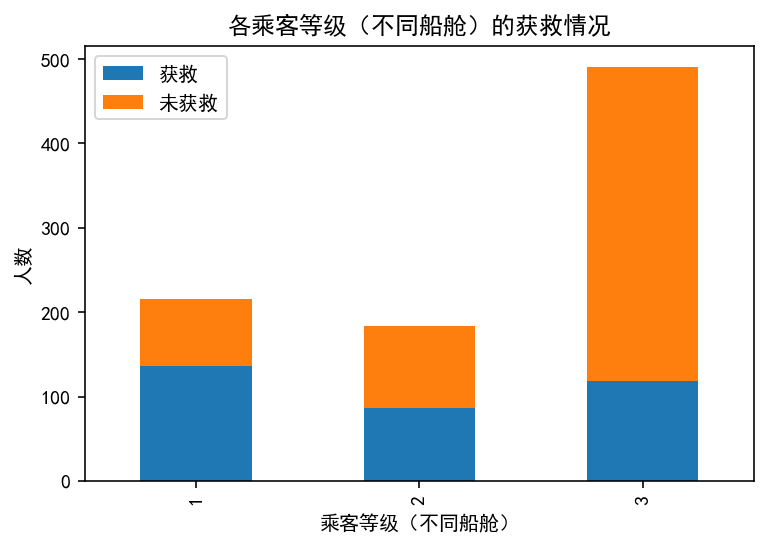

In [4]:
fig = plt.figure()
fig.set(alpha=0.2)

# 遇难，Survived_0 和 Survived_1 的类型是 pandas.core.series.Series
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
# 幸存
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

df = pd.DataFrame({'获救': Survived_1, '未获救': Survived_0})
df.plot(kind='bar', stacked=True)  # stacked 表示叠加
plt.title('各乘客等级（不同船舱）的获救情况')
plt.xlabel('乘客等级（不同船舱）')
plt.ylabel('人数')
plt.show()

In [5]:
type(Survived_0)

pandas.core.series.Series

可以看到，船舱的等级越高，获救人数的比例越大。

下面看看各性别乘客的获救情况。

In [6]:
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# 男性乘客
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()

df = pd.DataFrame({'男性': Survived_m, '女性': Survived_f})
df

,男性,女性
0,468,81
1,109,233


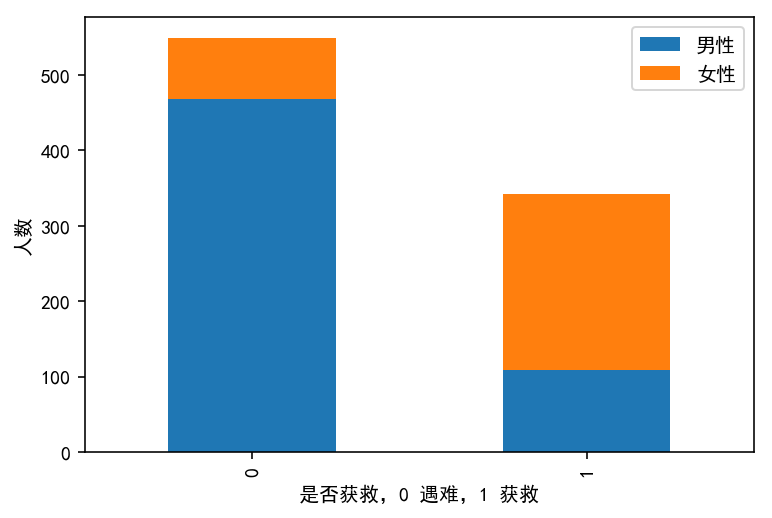

In [8]:
df.plot(kind='bar', stacked=True)

plt.xlabel('是否获救，0 遇难，1 获救')
plt.ylabel('人数')
plt.show()

详细分析。

In [9]:
data_train.Pclass[data_train.Pclass != 3].value_counts()

1    216
2    184
Name: Pclass, dtype: int64

In [10]:
data_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
data_train.Survived[data_train.Sex == 'female'][
    data_train.Pclass != 3].value_counts()

1    161
0      9
Name: Survived, dtype: int64

In [12]:
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass ==
                                                3].value_counts()

1    72
0    72
Name: Survived, dtype: int64

In [13]:
data_train.Survived[data_train.Sex == 'male'][
    data_train.Pclass != 3].value_counts()

0    168
1     62
Name: Survived, dtype: int64

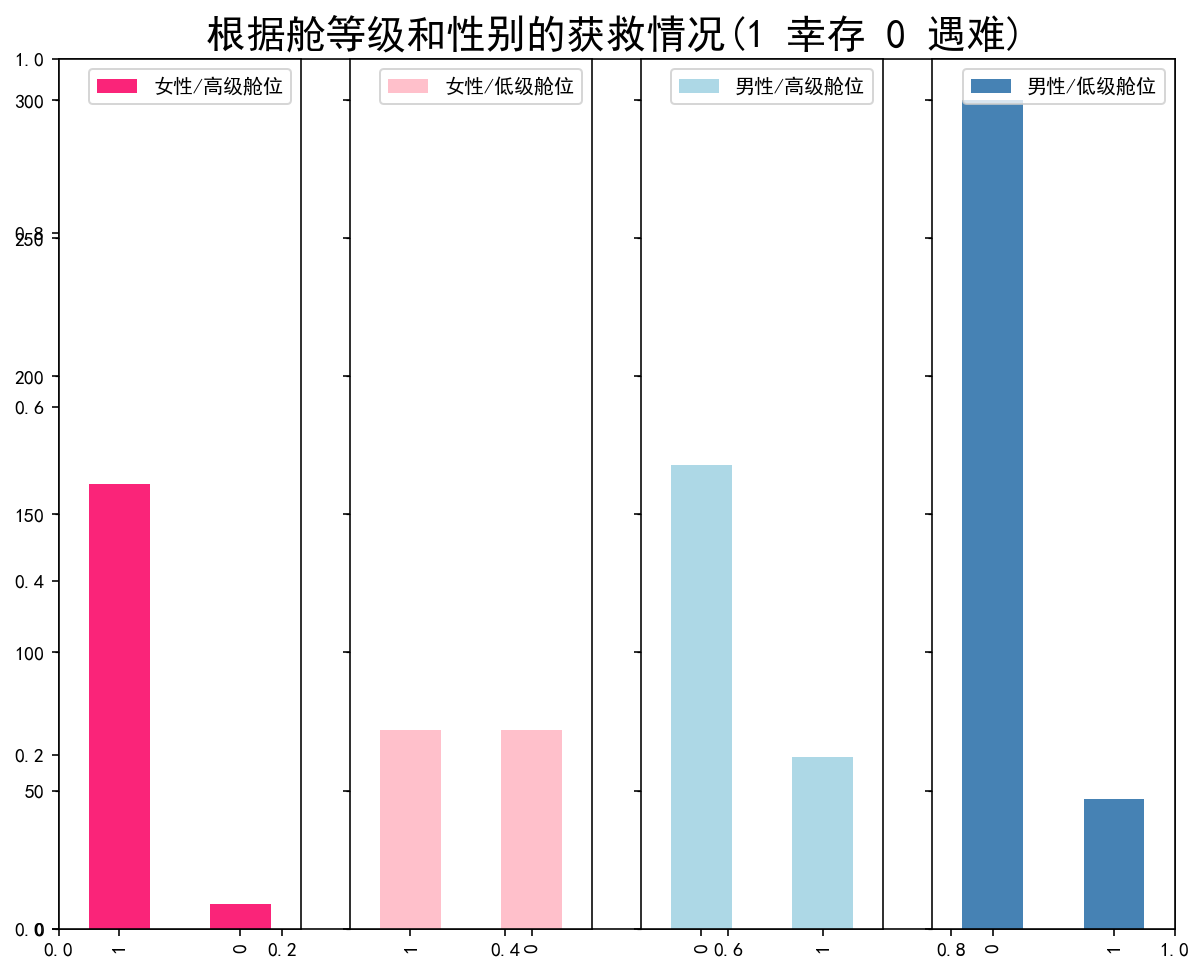

In [14]:
fig = plt.figure(figsize=(10, 8))
fig.set(alpha=0.65)
plt.title('根据舱等级和性别的获救情况(1 幸存 0 遇难)', fontsize=20)

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][
    data_train.Pclass != 3].value_counts().plot(
        kind='bar', label='female highclass', color='#FA2479')
# ax1.set_xticklabels(rotation=1)
ax1.legend(['女性/高级舱位'], loc='best')

# 与 ax1 共享坐标轴
ax2 = fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass ==
                                                3].value_counts().plot(
                                                    kind='bar',
                                                    label='female low class',
                                                    color='pink')
# ax2.set_xticklabels(['获救','遇难'],rotation=1)
ax2.legend(['女性/低级舱位'], loc='best')

# 与 ax1 共享坐标轴
ax3 = fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][
    data_train.Pclass != 3].value_counts().plot(
        kind='bar', label='male highclass', color='lightblue')
# ax3.set_xticklabels(['获救','遇难'],rotation=1)
ax3.legend(['男性/高级舱位'], loc='best')

# 与 ax1 共享坐标轴
ax4 = fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass ==
                                              3].value_counts().plot(
                                                  kind='bar',
                                                  label='male low class',
                                                  color='steelblue')
# ax4.set_xticklabels(['获救','遇难'],rotation=1)
ax4.legend(['男性/低级舱位'], loc='best')
plt.show()

各个登船舱口的情况。

<Figure size 432x288 with 0 Axes>

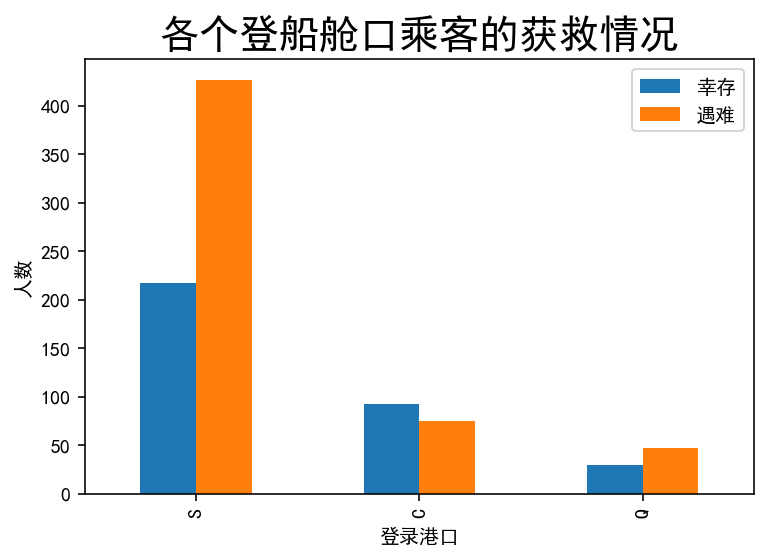

In [15]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()

df = pd.DataFrame({'幸存': Survived_1, '遇难': Survived_0})
df.plot(kind='bar', stacked=False)

plt.title('各个登船舱口乘客的获救情况', fontsize=20)
plt.xlabel('登录港口')
plt.ylabel('人数')

plt.show()

下面我们来看看 堂兄弟/妹，孩子/父母有几人，对是否获救的影响。

In [16]:
data_train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
data_train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


'PassengerId' 乘客 ID
'Survived' 1-生存，0-死亡
'Pclass' 几等舱（1-一等舱，2-二等舱，3-三等舱）
'Name'姓名
'Sex'性别
'Age'年龄
'SibSp'兄弟姐妹、配偶的数量
'Parch'父母孩子的数量
'Ticket'机票号码
'Fare'票价
'Cabin'客舱
'Embarked'登船的港口（C-瑟堡，Q-皇后镇，S-南安普顿）

In [18]:
g1 = data_train.groupby(['SibSp', 'Survived'])
df_SibSp = pd.DataFrame(g1.count()['PassengerId'])
df_SibSp

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [19]:
g2 = data_train.groupby(['Parch', 'Survived'])
df_Parch = pd.DataFrame(g2.count()['PassengerId'])
df_Parch

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [20]:
data_train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
F2                 3
E101               3
C22 C26            3
F33                3
D33                2
B57 B59 B63 B66    2
D20                2
B20                2
C83                2
E33                2
C124               2
D36                2
B18                2
E121               2
B58 B60            2
C52                2
B28                2
C126               2
E24                2
B49                2
E67                2
C68                2
C93                2
E44                2
B51 B53 B55        2
B35                2
                  ..
D56                1
D46                1
C95                1
E58                1
B73                1
E40                1
B41                1
B101               1
B71                1
C7                 1
C82                1
A6                 1
B82 B84            1
B42                1
C45                1
E63                1
D28          

<Figure size 432x288 with 0 Axes>

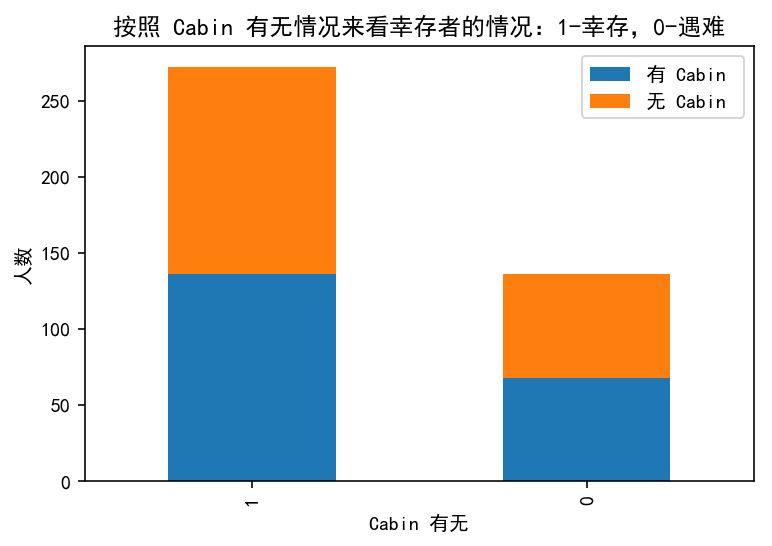

In [21]:
# 'Cabin'客舱
fig = plt.figure()
fig.set(alpha=0.2)

Survived_cabin = data_train.Survived[pd.notnull(
    data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.notnull(
    data_train.Cabin)].value_counts()

df = pd.DataFrame({'有 Cabin ': Survived_cabin, '无 Cabin ': Survived_nocabin})

df.plot(kind='bar', stacked=True)
plt.title('按照 Cabin 有无情况来看幸存者的情况：1-幸存，0-遇难')
plt.xlabel('Cabin 有无')
plt.ylabel('人数')
plt.show()

In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 填补缺失值

使用随机森林填补缺失的年龄数据。

In [23]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_temp = data_train[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
df_temp[df_temp.Age.notnull()].as_matrix()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[22.    ,  7.25  ,  0.    ,  1.    ,  3.    ],
       [38.    , 71.2833,  0.    ,  1.    ,  1.    ],
       [26.    ,  7.925 ,  0.    ,  0.    ,  3.    ],
       ...,
       [19.    , 30.    ,  0.    ,  0.    ,  1.    ],
       [26.    , 30.    ,  0.    ,  0.    ,  1.    ],
       [32.    ,  7.75  ,  0.    ,  0.    ,  3.    ]])

In [25]:
# 使用随机森林做回归
from sklearn.ensemble import RandomForestRegressor


def set_missing_ages(df):

    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    # 把乘客分成已知年龄和未知年龄两个部分
    know_age = age_df[age_df.Age.notnull()].as_matrix()
    unknow_age = age_df[age_df.Age.isnull()].as_matrix()

    # 此时，年龄作为 label
    y = know_age[:, 0]
    # 使用其它的特征来得到年龄
    X = know_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型预测未知年龄
    predict_ages = rfr.predict(unknow_age[:, 1::])
    # 将上一步预测的结果填补到缺失的位置
    df.loc[(df.Age.isnull(), 'Age')] = predict_ages
    return df, rfr


def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull(), 'Cabin')] = 'No'
    return df


data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [26]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


下面对离散型的特征进行特征因子化。

这一步使用 Pandas 的 get_dummies() 方法来完成。

In [27]:
dummies_Cabin = pd.get_dummies(data_train.Cabin, prefix='Cabin')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')

df = pd.concat(
    [data_train, dummies_Cabin, dummies_Pclass, dummies_Sex, dummies_Embarked],
    axis=1)
df.drop(
    ['Cabin', 'Pclass', 'Sex', 'Embarked', 'Name', 'Ticket'],
    axis=1,
    inplace=True)  # inplace 表示原地修改
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,1,0,0,1,0,0,0,1
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,0,1,0,1,0,1,0
6,7,0,54.000000,0,0,51.8625,0,1,1,0,0,0,1,0,0,1
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,0,1,0,1,0,1,0,0


Age 和 Fare 这两个属性，与其它属性不在一个数量级上，使用梯度下降算法的话，收敛慢。所以，我们要对这两个特征进行标准化。

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1, 1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1),
                                        age_scale_param)

fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1),
                                         fare_scale_param)

In [29]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,1,0,0,1,0,0,0,1,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,0,1,0,1,0,1,0,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,1,0,0,0,1,0,0,1,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,0,1,0,1,0,1,0,0,-1.148655,-0.042956


马上就到最后一步了。

## Logistic 回归建模

In [30]:
from sklearn.linear_model import LogisticRegression

# 注意，过滤数据使用的正则表达式中的 . 不要遗漏了
train_df = df.filter(
    regex=
    'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*'
)

train_np = train_df.as_matrix()
# 训练数据集的特征矩阵
X = train_np[:, 1:]

# 训练数据集的标签矩阵（Survival）
y = train_np[:, 0]

# penalty 惩罚
# tol：Tolerance for stopping criteria.
clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

clf.fit(X, y)
clf

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

于是，我们得到了模型。

下面对测试数据集也做同样的预处理。

In [31]:
ls

Chapter_4.2 泰坦尼克号罹难乘客预测.ipynb*
不用/
寒小阳：Kaggle 入门案例——泰坦尼克号幸存者问题.ipynb*
泰坦尼克号 + 特征选择.ipynb*
泰坦尼克号分析.ipynb*
泰坦尼克号：绘图.ipynb*
简易的随机森林模型和 XGBoost 模型.ipynb*


In [33]:
data_test = pd.read_csv('../input/test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [35]:
data_test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [36]:
# Fare 只有一个缺失值，干脆用 0 填充好了

data_test.loc[data_test.Fare.isnull(), 'Fare']

152   NaN
Name: Fare, dtype: float64

In [37]:
data_test.loc[data_test.Fare.isnull(), 'Fare'] = 0

In [38]:
data_test.loc[data_test.Fare.isnull(), 'Fare']

Series([], Name: Fare, dtype: float64)

In [39]:
tmp_df = data_test[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[tmp_df.Age.isnull()].as_matrix()
null_age

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[    nan,  7.8958,  0.    ,  0.    ,  3.    ],
       [    nan, 31.6833,  0.    ,  0.    ,  1.    ],
       [    nan, 21.6792,  0.    ,  2.    ,  3.    ],
       [    nan, 23.45  ,  2.    ,  1.    ,  3.    ],
       [    nan,  8.05  ,  0.    ,  0.    ,  3.    ],
       [    nan, 56.4958,  0.    ,  0.    ,  3.    ],
       [    nan, 26.55  ,  0.    ,  0.    ,  1.    ],
       [    nan,  7.75  ,  0.    ,  0.    ,  3.    ],
       [    nan, 15.5792,  0.    ,  0.    ,  2.    ],
       [    nan, 16.1   ,  0.    ,  1.    ,  3.    ],
       [    nan, 21.    ,  0.    ,  0.    ,  2.    ],
       [    nan,  8.05  ,  0.    ,  0.    ,  3.    ],
       [    nan,  7.8958,  0.    ,  0.    ,  3.    ],
       [    nan, 10.7083,  0.    ,  0.    ,  2.    ],
       [    nan, 14.4542,  0.    ,  1.    ,  3.    ],
       [    nan,  7.75  ,  0.    ,  0.    ,  3.    ],
       [    nan,  7.775 ,  0.    ,  0.    ,  3.    ],
       [    nan,  8.05  ,  0.    ,  0.    ,  3.    ],
       [    nan,  7.75  ,  0

In [40]:
X = null_age[:, 1:]

In [41]:
X

array([[ 7.8958,  0.    ,  0.    ,  3.    ],
       [31.6833,  0.    ,  0.    ,  1.    ],
       [21.6792,  0.    ,  2.    ,  3.    ],
       [23.45  ,  2.    ,  1.    ,  3.    ],
       [ 8.05  ,  0.    ,  0.    ,  3.    ],
       [56.4958,  0.    ,  0.    ,  3.    ],
       [26.55  ,  0.    ,  0.    ,  1.    ],
       [ 7.75  ,  0.    ,  0.    ,  3.    ],
       [15.5792,  0.    ,  0.    ,  2.    ],
       [16.1   ,  0.    ,  1.    ,  3.    ],
       [21.    ,  0.    ,  0.    ,  2.    ],
       [ 8.05  ,  0.    ,  0.    ,  3.    ],
       [ 7.8958,  0.    ,  0.    ,  3.    ],
       [10.7083,  0.    ,  0.    ,  2.    ],
       [14.4542,  0.    ,  1.    ,  3.    ],
       [ 7.75  ,  0.    ,  0.    ,  3.    ],
       [ 7.775 ,  0.    ,  0.    ,  3.    ],
       [ 8.05  ,  0.    ,  0.    ,  3.    ],
       [ 7.75  ,  0.    ,  0.    ,  3.    ],
       [ 7.75  ,  0.    ,  0.    ,  3.    ],
       [ 8.7125,  0.    ,  0.    ,  3.    ],
       [ 7.7792,  0.    ,  0.    ,  3.    ],
       [ 6

In [42]:
predict_ages = rfr.predict(X)
predict_ages

array([27.94720616, 52.31431111, 23.45968333, 16.1939502 , 30.70572678,
       29.56889809, 49.8994093 , 35.2958243 , 42.50319048, 26.68916849,
       35.47286304, 30.70572678, 27.94720616, 34.59178757, 20.80015413,
       35.2958243 , 27.51545426, 30.70572678, 35.2958243 , 35.2958243 ,
       29.04293865, 27.51545426, 36.35915   , 31.09342985, 35.2958243 ,
       23.31368333, 39.74939405, 29.27608333, 49.72041746, 49.8994093 ,
       27.94720616, 19.89558113, 35.09787898, 41.20008848, 31.10838452,
       22.87630686, 35.2958243 , 10.86986696, 57.74249226, 23.47643239,
       27.30887391, 47.8021256 , 27.86873699, 22.38011324, 30.70572678,
       25.34409583, 35.2958243 , 22.38011324, 24.5728117 , 16.1939502 ,
       20.80015413, 31.10838452, 35.2958243 , 27.94720616, 38.83477484,
       31.10838452, 30.70572678, 35.2958243 , 33.12898535, 29.51820514,
       35.2958243 , 29.78279613, 22.87630686, 30.70572678, 39.17490238,
       22.87630686, 23.45968333, 31.71894048, 35.2958243 , 31.10

In [43]:
data_test.loc[data_test.Age.isnull(), 'Age'] = predict_ages

In [44]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S


In [45]:
data_test = set_Cabin_type(data_test)

In [46]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,No,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,No,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,No,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,No,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,No,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,No,S
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,No,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,No,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,No,C
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,No,S


In [47]:
dummies_Cabin = pd.get_dummies(data_test.Cabin, prefix='Cabin')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix='Pclass')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix='Sex')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix='Embarked')

In [48]:
df_test = pd.concat(
    [data_test, dummies_Cabin, dummies_Pclass, dummies_Sex, dummies_Embarked],
    axis=1)

In [49]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,No,...,1,0,0,0,1,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,No,...,1,0,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,No,...,1,0,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,No,...,1,0,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,No,...,1,0,0,0,1,1,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,No,...,1,0,0,0,1,0,1,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,No,...,1,0,0,0,1,1,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,No,...,1,0,0,1,0,0,1,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,No,...,1,0,0,0,1,1,0,1,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,No,...,1,0,0,0,1,0,1,0,0,1


In [50]:
df_test.drop(
    ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
    axis=1,
    inplace=True)

In [51]:
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(
    -1, 1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(
    -1, 1), fare_scale_param)

In [52]:
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,0,1,0,1,0,1,0,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,0,1,1,0,0,1,0,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,1,0,0,1,0,0,1,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,0,0,1,1,0,1,0,0,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [53]:
df_test[:10]

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,0,1,0,1,0,1,0,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.0,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.0,0,0,7.6292,1,0,0,0,1,1,0,0,1,0,-0.034018,-0.500221
7,899,26.0,1,1,29.0000,1,0,0,1,0,0,1,0,0,1,-0.337609,-0.117238
8,900,18.0,0,0,7.2292,1,0,0,0,1,1,0,1,0,0,-0.944790,-0.507390
9,901,21.0,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [54]:
test = df_test.filter(
    regex='Age_.*|Fare_.*|SibSp|Parch|Cabin_.*|Pclass_.*|Sex_.*|Embarked_.*')
test

,SibSp,Parch,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,0,0,1,0,0,0,1,0,1,0,1,0,0.307521,-0.496637
1,1,0,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,0,0,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,0,0,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,1,1,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,0,0,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,0,0,1,0,0,0,1,1,0,0,1,0,-0.034018,-0.500221
7,1,1,1,0,0,1,0,0,1,0,0,1,-0.337609,-0.117238
8,0,0,1,0,0,0,1,1,0,1,0,0,-0.944790,-0.507390
9,2,0,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [55]:
predictions = clf.predict(test)

In [56]:
data_test[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,No,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,No,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,No,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,No,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,No,S


In [57]:
data_test['PassengerId'].as_matrix()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [58]:
predictions.astype(np.int32)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
result = pd.DataFrame({
    'PassengerId': data_test['PassengerId'].as_matrix(),
    'Survived': predictions.astype(np.int32)
})

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [60]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [61]:
result.to_csv('./logistic_regression_predictions.csv', index=False)

此时就可以提交了。

In [62]:
train_df.columns[1:]

Index(['SibSp', 'Parch', 'Cabin_No', 'Cabin_Yes', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_scaled', 'Fare_scaled'],
      dtype='object')

In [63]:
clf.coef_

array([[-0.34423584, -0.10491618, -0.04301548,  0.85909236,  0.34115859,
         0.        , -1.19413154,  1.99958764, -0.63440419,  0.        ,
         0.        , -0.41726404, -0.52376675,  0.08443507]])

In [64]:
pd.DataFrame({
    'columns': list(train_df.columns[1:]),
    'coef': list(clf.coef_.T)
})

,columns,coef
0,SibSp,[-0.3442358434362234]
1,Parch,[-0.10491617530856369]
2,Cabin_No,[-0.043015482052696515]
3,Cabin_Yes,[0.8590923622868575]
4,Pclass_1,[0.34115859195929366]
5,Pclass_2,[0.0]
6,Pclass_3,[-1.1941315396367065]
7,Sex_female,[1.999587637086474]
8,Sex_male,[-0.6344041943404901]
9,Embarked_C,[0.0]


交叉验证

In [68]:


clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(
    regex=
    'Survived|Age_.*|Fare_.*|SibSp|Parch|Cabin_.*|Pclass_.*|Sex_.*|Embarked_.*'
)

In [69]:
type(all_data.as_matrix())

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [70]:
X = all_data.as_matrix()[:, 1:]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [71]:
y = all_data.as_matrix()[:, 0]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [73]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

array([0.81564246, 0.81564246, 0.78651685, 0.78651685, 0.81355932])